In [8]:
import pickle
import scipy.sparse

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helper_functions import *
from scipy.sparse import dok_matrix

In [2]:
col_names_consumption = ['user-mboxsha1', 'musicbrainz-artist-id', 'artist-name', 'plays']

df = pd.read_csv('../data/usersha1-artmbid-artname-plays.tsv', sep='\t', names=col_names_consumption)
df = df.rename({'user-mboxsha1':'user_id', 'musicbrainz-artist-id':'artist_id'}, axis=1)
df = df[['user_id', 'artist_id', 'plays']]
df.head()

,user_id,artist_id,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,706


# Data Processing

## Filter the data

In [3]:
df.isna().sum()

user_id           0
artist_id    226137
plays             0
dtype: int64

In [4]:
df.shape

(17535655, 3)

In [5]:
# Since there are 1.29% of NaN for the artists, we remove all the rows from df that contains a NaN
df = df.dropna()
df.shape

(17309518, 3)

In [6]:
# Some plays are equal to 0 which is not normal, we delete these rows
df = df.loc[df['plays'] >= 1]

### Thresholds distributions

In [63]:
T1 = 100  # Number of plays per user threshold
T2 = 47    # Number of artists per user threshold

T3 = 65 # Number of plays per artist threshold
T4 = 60  # Number of users per artist threshold

#### Number of plays per user threshold distribution

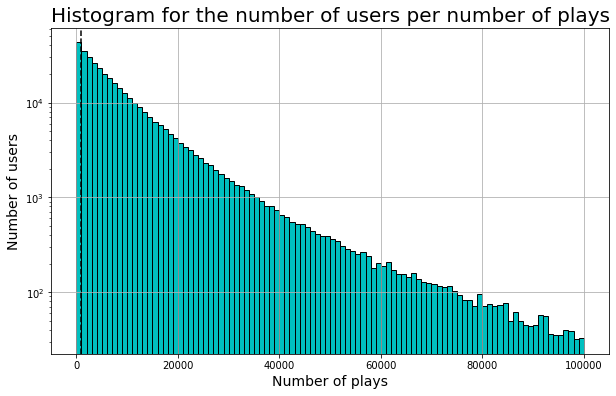

In [30]:
grouped_user = df[['user_id', 'plays']].groupby('user_id').sum()
grouped_user = grouped_user.sort_values(by='plays', ascending=False)
# Only show users having less than 100'000 plays
grouped_user = grouped_user[grouped_user['plays'] <= 100000]

grouped_user.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of users per number of plays', fontsize=20)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of users', fontsize=14)

plt.axvline(T1, linestyle='--', color='k') 
plt.show()

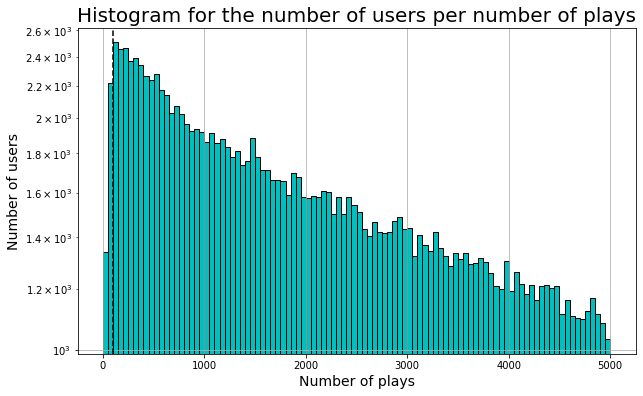

In [66]:
grouped_user = df[['user_id', 'plays']].groupby('user_id').sum()
grouped_user = grouped_user.sort_values(by='plays', ascending=False)
# Only show users having less than 5'000 plays
nb_users = 5000
grouped_user = grouped_user[grouped_user['plays'] <= nb_users]

grouped_user.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of users per number of plays', fontsize=20)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of users', fontsize=14)

plt.axvline(T1, linestyle='--', color='k') 
plt.show()

#### Number of artists per user threshold

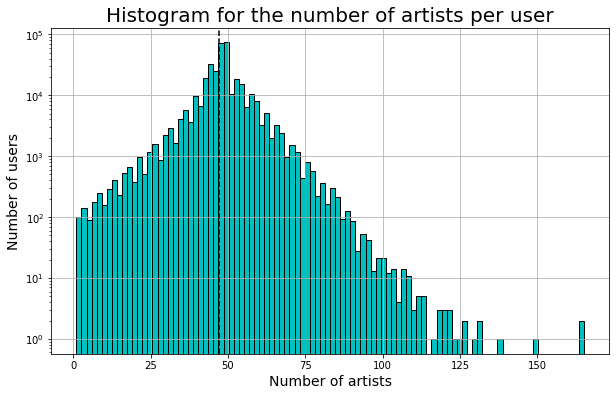

In [69]:
grouped_user = df[['user_id', 'plays']].groupby('user_id').count().rename(columns = {'plays': 'count'})
grouped_user = grouped_user.sort_values(by='count', ascending=False)

grouped_user.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of artists per user', fontsize=20)
plt.xlabel('Number of artists', fontsize=14)
plt.ylabel('Number of users', fontsize=14)

plt.axvline(T2, linestyle='--', color='k') 
plt.show()

#### Number of plays per artist threshold

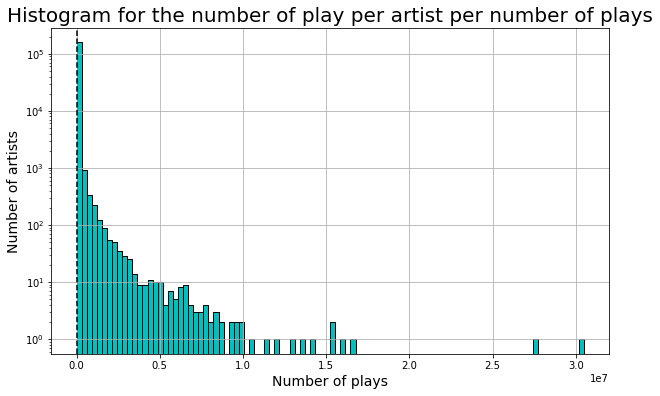

In [32]:
grouped_artist = df[['artist_id', 'plays']].groupby('artist_id').sum()
grouped_artist = grouped_artist.sort_values(by='plays', ascending=False)

grouped_artist.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of play per artist per number of plays', fontsize=20)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of artists', fontsize=14)
plt.savefig('artists_p_plays.pdf', bbox_inches='tight')

plt.axvline(T3, linestyle='--', color='k') 
plt.show()

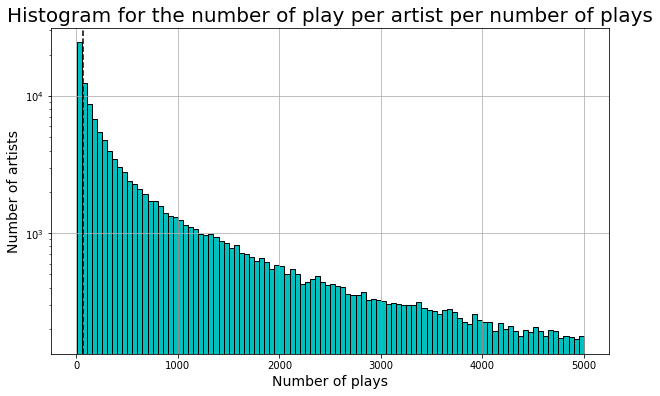

In [77]:
grouped_artist = df[['artist_id', 'plays']].groupby('artist_id').sum()
grouped_artist = grouped_artist.sort_values(by='plays', ascending=False)
# Only show artists having less than 10'000 plays
nb_artists = 5000
grouped_artist = grouped_artist[grouped_artist['plays'] <= nb_artists]

grouped_artist.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of play per artist per number of plays', fontsize=20)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of artists', fontsize=14)
plt.savefig('artists_p_plays.pdf', bbox_inches='tight')

plt.axvline(T3, linestyle='--', color='k') 
plt.show()

#### Number of users per artist threshold

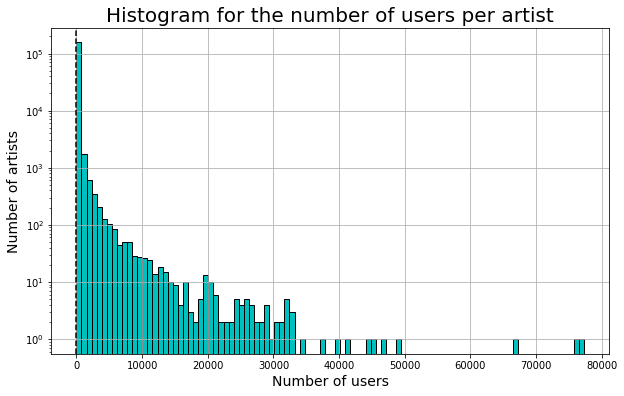

In [52]:
grouped_artist = df[['artist_id', 'plays']].groupby('artist_id').count().rename(columns = {'plays': 'count'})
grouped_artist = grouped_artist.sort_values(by='count', ascending=False)

grouped_artist.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of users per artist', fontsize=20)
plt.xlabel('Number of users', fontsize=14)
plt.ylabel('Number of artists', fontsize=14)

plt.axvline(T4, linestyle='--', color='k') 
plt.show()

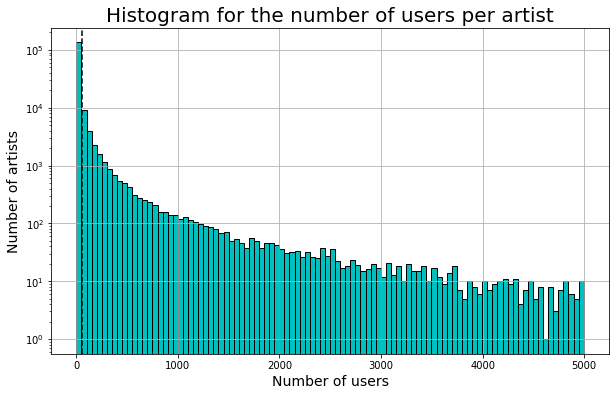

In [74]:
grouped_artist = df[['artist_id', 'plays']].groupby('artist_id').count().rename(columns = {'plays': 'count'})
grouped_artist = grouped_artist.sort_values(by='count', ascending=False)
# Keep only a maximum count of 5'000 
nb_users_count = 5000
grouped_artist = grouped_artist[grouped_artist['count'] <= nb_users_count]

grouped_artist.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of users per artist', fontsize=20)
plt.xlabel('Number of users', fontsize=14)
plt.ylabel('Number of artists', fontsize=14)

plt.axvline(T4, linestyle='--', color='k')
plt.show()

## Construction of the matrix of plays

In [78]:
plays_per_user = df[['user_id', 'plays']].groupby('user_id').sum()
artists_per_user = df[['user_id', 'plays']].groupby('user_id').count().rename({'plays':'n_artists'}, axis=1)

plays_per_artist = df[['artist_id', 'plays']].groupby('artist_id').sum()
users_per_artist = df[['artist_id', 'plays']].groupby('artist_id').count().rename({'plays':'n_users'}, axis=1)

In [79]:
# Store the list of intesting users in a set for performance (membership of elem and intersection)

users_filtered = set(plays_per_user[plays_per_user['plays'] > T1].index)
print('Number of users after filtering with T1: {}'.format(len(users_filtered)))
users_filtered = users_filtered & set(artists_per_user[artists_per_user['n_artists'] > T2].index)
print('Number of users after filtering with T1 and T2: {}'.format(len(users_filtered)))

artists_filtered = set(plays_per_artist[plays_per_artist['plays'] > T3].index)
print('Number of artists after filtering with T3: {}'.format(len(artists_filtered)))
artists_filtered = artists_filtered & set(users_per_artist[users_per_artist['n_users'] > T4].index)
print('Number of artists after filtering with T3 and T4: {}'.format(len(artists_filtered)))

Number of users after filtering with T1: 355302
Number of users after filtering with T1 and T2: 92207
Number of artists after filtering with T3: 123227
Number of artists after filtering with T3 and T4: 60938


However, we would like to have a single matrix where we keep the users and the artists who all satisfy the 4 different thresholds. But since the thresholds are interdependent, removing users will also make us remove artists, and the other way around. Therefore we iterate on removing alternatively the users and the artists, until we converge to two subsets of artists and users which both satisfy the 4 thresholds.

In [80]:
num_iterations = 15
users_filtered_iteration = None
artists_filtered_iteration = None

plays_per_user_filtered = plays_per_user.copy()
artists_per_user_filtered = artists_per_user.copy()

plays_per_artist_filtered = plays_per_artist.copy()
users_per_artist_filtered = users_per_artist.copy()

previous_users_filtered_iteration = set(plays_per_user_filtered.index)
previous_artists_filtered_iteration = set(plays_per_artist_filtered.index)

for i in range(num_iterations):
    
    # Filter users
    users_filtered_iteration = set(plays_per_user_filtered[plays_per_user_filtered['plays'] > T1].index)
    users_filtered_iteration = users_filtered_iteration & set(artists_per_user_filtered[artists_per_user_filtered['n_artists'] > T2].index)
    users_filtered_iteration = users_filtered_iteration & previous_users_filtered_iteration
    
    temp = df[df['user_id'].isin(users_filtered_iteration)]
    temp = temp[temp['artist_id'].isin(previous_artists_filtered_iteration)]
    
    temp = temp[['artist_id', 'plays']].groupby('artist_id')
    plays_per_artist_filtered = temp.sum()
    users_per_artist_filtered = temp.count().rename({'plays':'n_users'}, axis=1)
    
    # Filter artists
    artists_filtered_iteration = set(plays_per_artist_filtered[plays_per_artist_filtered['plays'] > T3].index)
    artists_filtered_iteration = artists_filtered_iteration & set(users_per_artist_filtered[users_per_artist_filtered['n_users'] > T4].index)
    artists_filtered_iteration = artists_filtered_iteration & previous_artists_filtered_iteration
    
    temp = df[df['user_id'].isin(users_filtered_iteration)]
    temp = temp[temp['artist_id'].isin(artists_filtered_iteration)]
    temp = temp[['user_id', 'plays']].groupby('user_id')
    plays_per_user_filtered = temp.sum()
    artists_per_user_filtered = temp.count().rename({'plays':'n_artists'}, axis=1)
    
    print("iteration {}, num users {}, num artists {}".format(i+1, len(users_filtered_iteration), len(artists_filtered_iteration)))
    
    # Stop condition
    if previous_users_filtered_iteration == users_filtered_iteration and previous_artists_filtered_iteration == artists_filtered_iteration:
        print("Converged!")
        break
        
    previous_users_filtered_iteration = users_filtered_iteration.copy()
    previous_artists_filtered_iteration = artists_filtered_iteration.copy()
    

iteration 1, num users 92207, num artists 34501
iteration 2, num users 71479, num artists 27543
iteration 3, num users 65662, num artists 25517
iteration 4, num users 63626, num artists 24765
iteration 5, num users 62811, num artists 24477
iteration 6, num users 62462, num artists 24353
iteration 7, num users 62333, num artists 24304
iteration 8, num users 62280, num artists 24280
iteration 9, num users 62249, num artists 24265
iteration 10, num users 62229, num artists 24256
iteration 11, num users 62220, num artists 24252
iteration 12, num users 62218, num artists 24251
iteration 13, num users 62218, num artists 24251
Converged!


## Storing data in sparse matrix

- One user per column
- One artist per row

In [92]:
# Dictionnary for retrieving the index of a user in the matrix in O(1)

user2id = {}
id2user = {}
for i, user in enumerate(sorted(users_filtered_iteration)):
    user2id[user] = i
    id2user[i] = user

artist2id = {}
id2artist = {}
for i, artist in enumerate(sorted(artists_filtered_iteration)):
    artist2id[artist] = i
    id2artist[i] = artist

In [106]:
save_to_pickle(user2id, 'user2id', '../data/')
save_to_pickle(id2user, 'id2user', '../data/')

save_to_pickle(artist2id, 'artist2id', '../data/')
save_to_pickle(id2artist, 'id2artist', '../data/')

In [93]:
# Create the sparse matrix
S = dok_matrix((len(artists_filtered_iteration), len(users_filtered_iteration)), dtype=np.uint8)

In [94]:
# Fill the data dictionnary
data = {}

for i, (index, row) in enumerate(df.iterrows()):
    
    if i % 1000000 == 0:
        print('Processed {} lines...'.format(i))
    
    user = row['user_id']
    artist = row['artist_id']
    
    # Keep only interesting users and artists
    if (user in users_filtered_iteration) and (artist in artists_filtered_iteration):
        
        data[(artist2id[artist], user2id[user])] = row['plays']

Processed 0 lines...
Processed 1000000 lines...
Processed 2000000 lines...
Processed 3000000 lines...
Processed 4000000 lines...
Processed 5000000 lines...
Processed 6000000 lines...
Processed 7000000 lines...
Processed 8000000 lines...
Processed 9000000 lines...
Processed 10000000 lines...
Processed 11000000 lines...
Processed 12000000 lines...
Processed 13000000 lines...
Processed 14000000 lines...
Processed 15000000 lines...
Processed 16000000 lines...
Processed 17000000 lines...


In [97]:
# store it in the sparse matrix
dict.update(S, data)
S = S.tocsr()

# free the memory
data = {}
del data

In [99]:
scipy.sparse.save_npz('../data/matrix_plays.npz', S)

## Compute random user jumper and user jumper for the artist embedding

In [115]:
NB_SAMPLE = 3000

In [116]:
'''
Random user jumper: Selects pair of random artists.
'''

selected_artists = np.random.choice(np.arange(S.shape[0]), size = (NB_SAMPLE, 2), replace=False)
artists_tuples = []
for tup in selected_artists:
    artists_tuples.append((tup[0], tup[1]))
save_to_pickle(artists_tuples, 'random_user_jumper_tuples', '../data/artist_embeddings/')

In [117]:
'''
User jumper: Select NB_SAMPLE users from the set of users and for each user selected, we select 2 artists
'''

selected_users = list(set(np.random.randint(S.shape[1] - 1, size=int(2*NB_SAMPLE))))

S_filter = S[:, selected_users]

# Create and store artists tuples
artists_tuples = []
for i in range(S_filter.shape[1]):
    idx = S_filter[:, i].nonzero()[0]

    if len(artists_tuples) >= NB_SAMPLE:
        break
    
save_to_pickle(artists_tuples, 'user_jumper_tuples', '../data/artist_embeddings/')

## Compute random artist jumper and artist jumper for the user embedding

In [118]:
'''
Random artist jumper: Selects pair of random users.
'''
S2 = S.T
selected_users = np.random.choice(np.arange(S2.shape[0]), size = (NB_SAMPLE, 2), replace=False)
users_tuples = []
for tup in selected_users:
    users_tuples.append((tup[0], tup[1]))
save_to_pickle(users_tuples, 'random_artist_jumper_tuples', '../data/user_embeddings/')

In [119]:
'''
Artist jumper: Select NB_SAMPLE artists from the set of users and for each artist selected, we select 2 users.
'''

selected_artists = list(set(np.random.randint(S2.shape[1] - 1, size=int(2*NB_SAMPLE))))

S2_filter = S2[:, selected_artists]

# Create and store artists tuples
users_tuples = []
for i in range(S2_filter.shape[1]):
    idx = S2_filter[:, i].nonzero()[0]
    if len(idx) >= 2:
        selected_users = np.random.choice(idx, 2, replace=False)
        users_tuples.append((selected_users[0], selected_users[1]))
    if len(users_tuples) >= NB_SAMPLE:
        break
    
save_to_pickle(users_tuples, 'artist_jumper_tuples', '../data/user_embeddings/')